In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [4]:
#RGB在opencv讀進來會是BGR的模式
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [12]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

(1024, 1024, 3)
[[107.69216     95.56370383  71.60211064]
 [163.22613261 197.72362568 120.58351272]]
[[183.78227568 182.50778591 164.56584511]
 [ 57.94147699  54.86579863  45.99707783]
 [160.64896552 204.77223196 114.70373856]
 [143.71425498 128.06165828  96.9327666 ]]
[[169.42518404 163.18056883 141.21743988]
 [163.4057941  211.83343148 117.66277733]
 [ 37.79468465  40.15246982  40.88833457]
 [197.83233954 198.89254227 186.24417565]
 [113.93714199  98.29215244  66.80992654]
 [148.33909263 132.58627854 102.60926531]
 [154.67418067 192.73392816 110.88767749]
 [220.26632997 190.75286195  36.86060606]]
[[165.26217566 213.78585036 119.41226762]
 [115.90158596 103.5072      72.00373333]
 [177.80706678 179.21704088 155.37641528]
 [ 26.04742834  27.2892614   26.0978889 ]
 [155.5309512  140.15666832 110.46849989]
 [228.71520619 203.04639175  37.25622852]
 [157.18997517 192.92616276 112.2094069 ]
 [140.77145804 182.25437797 107.44026772]
 [137.05346902 123.18044752  93.19904907]
 [159.12642773 

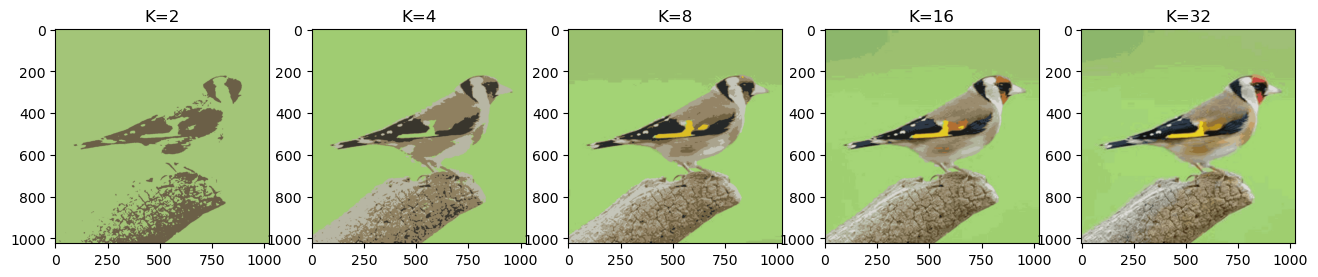

In [24]:
h,w,c=img.shape
print(img.shape)
#通常會是影像的高跟寬跟影像的channel數, 3表示RGB
#output為(1024,1024,3)
Z=img.reshape((-1,3)) 
#image的資料讀進來會是array所以可以直接用numpy的reshape
#將資料轉成三維
#Z.shape  output為(1024x1024,3)
#Z  output為array([[129, 175, 100],
#      [129, 175, 100],
#      [129, 175, 100],
#      ...,
#      [153, 207, 109],
#      [153, 207, 109],
#      [153, 207, 109]], dtype=uint8)

#分成兩群
#K=2
#label,center=km_clust(Z,K)
#但現在output出來會有小數點, 如[[107.69008695  95.56129696  71.60061825]
# [163.22597756 197.72311134 120.58332123]]
#Now convert back into uint8, and make original image
#center=np.uint8(center[:,:3]) #轉換所有維度
#center
#output為array([[163, 197, 120],
#       [107,  95,  71]], dtype=uint8)
#label.flatten() 降到一維
#res=center[label.flatten()] #這樣比較好找index值
#res
#output變成array([[163, 197, 120],
#       [163, 197, 120],
#       [163, 197, 120],
#      ...,
#      [163, 197, 120],
#      [163, 197, 120],
#      [163, 197, 120]], dtype=uint8)
#即依據label的0跟1, label是0的轉成163,197,120
#label是1的轉成107,95,71
#但須注意, 此時res已經變成二維了（1024x1024）, 之後要記得再轉回三維
#res=res.reshape(img.shape)

#plt.figure(figsize=(16,12))
#plt.title('K={}'.format(K))
#plt.imshow(res)

#多分幾群
Ka=[2,4,8,16,32]
plt.figure(figsize=(16,12))

for i,K in enumerate(Ka):
    label,center=km_clust(Z,K)
    #Now convert back into uint8, and make original image
    center=np.uint8(center[:,:3])
    res=center[label.flatten()]
    res=res.reshape(img.shape)
    
    plt.subplot(1,len(Ka),i+1) #依序生成圖
    plt.title('K={}'.format(K))
    plt.imshow(res)
    
plt.show() #確保圖會show在jupyter notebook上

In [19]:
label

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

## 1-2. cluster with RGB values and the location

[[154.51915886 186.79133032 117.13729802 508.81154289 255.08189542]
 [156.37253255 180.04824168 110.31970395 514.17923262 767.03829669]]
[[157.03236218 179.08655541 122.72365602 766.23780091 255.03519001]
 [151.97080527 194.19201357 111.40141991 253.94146885 255.58460307]
 [157.16794796 182.98589937 111.46277862 769.0997879  767.28916055]
 [155.60714096 177.47162744 109.28786614 257.39556119 767.31139229]]
[[157.11431208 182.14843121 114.08676174 165.19127517 851.53253356]
 [147.798127   145.99856658 104.56387241 795.53372968 518.66020491]
 [150.50405418 191.92112909 112.17065015 514.56666596 216.8357616 ]
 [159.95698482 202.23079036 117.71954307 856.03200391 858.27723851]
 [151.99924852 194.09386037 111.73070147 167.16796506 170.2187153 ]
 [160.05575687 181.33027686 110.49130401 509.43320495 806.58492742]
 [164.27974873 187.3624479  134.32061381 855.37835287 171.65644761]
 [154.09618091 188.77703579 108.74785452 231.78129915 510.13946991]]
[[162.58085962 210.41952341 118.82773385 377.

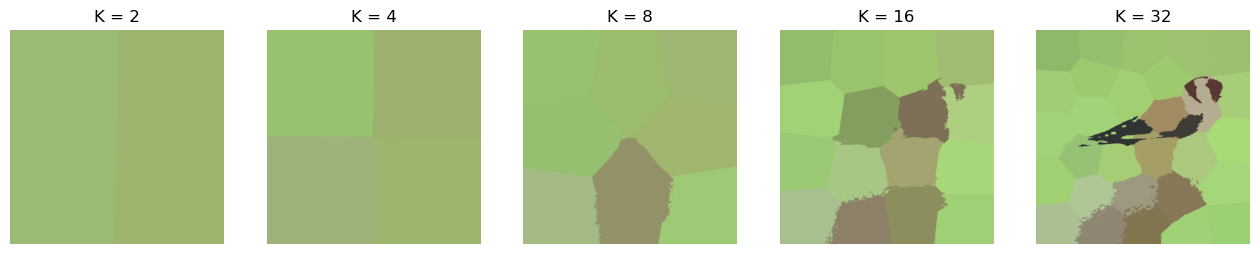

In [25]:
h, w, c = img.shape

#Added location feature
#多加高跟寬進來
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5) #五個特徵值

#以上程式碼跟上一塊cell都是做一樣的
Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

[[153.01160566 174.42693555 108.06123692 133.1120804  187.2236389 ]
 [158.20349588 193.5825255  120.12832172 121.94943043  60.72413309]]
[[167.56597161 206.09516163 123.00969923 169.24626544 211.82381008]
 [166.10276572 199.67596206 129.65704453 168.08866969  51.51146661]
 [157.91956496 192.79108574 112.34850949  45.8563058  124.39140507]
 [113.99114494 101.88165109  75.836658   173.13200095 137.94035052]]
[[158.03735878 199.65544874 110.68508175  45.10245597 125.90647849]
 [164.59050978 211.3804803  120.33402934 194.59414918 212.38719031]
 [156.22202432 200.99137    114.55311301  67.60169698  41.8182586 ]
 [162.7823601  145.30328743 106.01854225 124.36023054 156.57201542]
 [ 47.18925641  48.06989744  45.97658974 116.65824359 136.72758333]
 [167.98311481 200.42014214 133.59420147 188.13308349  53.03062706]
 [132.11728205 119.79341196  90.18595232 218.45059454 127.91862602]
 [166.63372058 198.48514132 122.22846172  56.58487133 220.6679213 ]]
[[169.17043733 209.76506958 116.09263807 158.

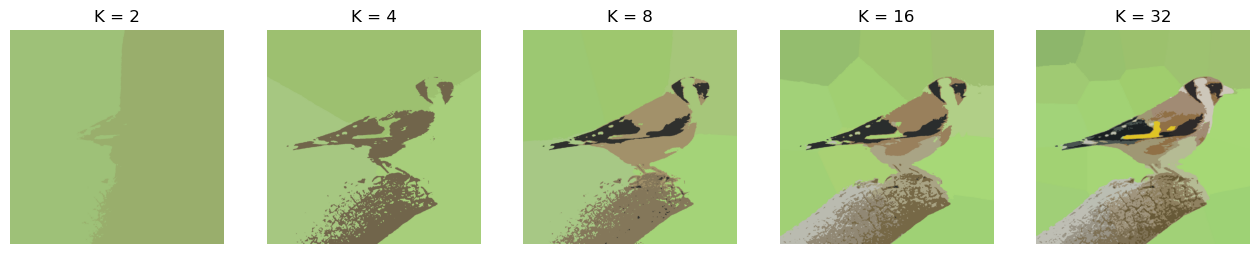

In [27]:
h, w, c = img.shape

#Added location feature
#多加高跟寬進來
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]]) #除以4讓高跟寬的特徵跟pixel的範圍是一樣的(pixel是256)
Z = Z.reshape(-1, 5) #五個特徵值

#以上程式碼跟上一塊cell都是做一樣的
Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()